<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/stats/Paphosweather_compare_last_year.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Last year weather purchased from https://home.openweathermap.org/marketplace/my_orders

In [1]:
from datetime import date
from datetime import datetime,date
import time
import pandas as pd
import numpy as np
import statistics as st
from dateutil import parser

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Use bash commands to copy the most recent file from Google Drive to Colab environment
!cd /content/drive/MyDrive/weather && \
latest_file=$(ls -t | head -1) && \
echo $latest_file && \
cp $latest_file /content/


paphos2024-07-28.csv


In [ ]:
file="paphos2024-07-28.csv"

In [10]:
import pandas as pd


thisweek=pd.read_csv(file,usecols=['datetime','temp','feelslike','humidity'],parse_dates=['datetime'])
thisweek.set_index('datetime', inplace=True)
thisweek=thisweek.between_time('08:00', '18:00')


In [21]:
lastyear=pd.read_csv("https://raw.githubusercontent.com/werowe/HypatiaAcademy/master/stats/paphos-2023-2023-weather.csv",usecols=['dt_iso','temp','feels_like','humidity'])

# Function to clean and convert the timestamp strings
def clean_timestamp(timestamp):
    # Remove the " UTC" part and convert to datetime
    cleaned_timestamp = timestamp.replace(" UTC", "")
    return pd.to_datetime(cleaned_timestamp)

# Apply the function to the Timestamp column
lastyear['dt_iso'] = lastyear['dt_iso'].apply(clean_timestamp)

lastyear['datetime'] = pd.to_datetime(lastyear['dt_iso'])

lastyear.set_index('datetime', inplace=True)

lastyear=lastyear.between_time('08:00', '18:00')



In [22]:
lastyear['match'] = lastyear.index.strftime('%m-%d %H:%M')
thisweek['match'] = thisweek.index.strftime('%m-%d %H:%M')

In [45]:
lastyear.drop(columns=['dt_iso'], inplace=True)

In [46]:
thisweek

,temp,feelslike,humidity,match
datetime,,,,
2024-07-14 08:00:00,28.9,30.8,59.51,07-14 08:00
2024-07-14 09:00:00,29.0,32.2,67.63,07-14 09:00
2024-07-14 10:00:00,30.0,33.9,65.48,07-14 10:00
2024-07-14 11:00:00,30.8,35.0,62.60,07-14 11:00
2024-07-14 12:00:00,30.7,35.7,66.12,07-14 12:00
...,...,...,...,...
2024-07-28 14:00:00,33.2,34.9,43.37,07-28 14:00
2024-07-28 15:00:00,33.1,34.7,43.33,07-28 15:00
2024-07-28 16:00:00,34.0,36.4,43.90,07-28 16:00


In [47]:
lastyear

,temp,feels_like,humidity,match
datetime,,,,
2023-01-01 08:00:00+00:00,17.28,16.24,45,01-01 08:00
2023-01-01 09:00:00+00:00,18.33,17.29,41,01-01 09:00
2023-01-01 10:00:00+00:00,18.30,17.28,42,01-01 10:00
2023-01-01 11:00:00+00:00,18.32,17.38,45,01-01 11:00
2023-01-01 12:00:00+00:00,18.17,17.19,44,01-01 12:00
...,...,...,...,...
2024-07-28 14:00:00+00:00,30.29,32.38,55,07-28 14:00
2024-07-28 15:00:00+00:00,30.29,32.38,55,07-28 15:00
2024-07-28 16:00:00+00:00,29.40,32.08,62,07-28 16:00


In [48]:


intersection = pd.merge(lastyear, thisweek, on='match', how='inner')


In [54]:
intersection.set_index("match",inplace=True)

In [55]:
intersection

,temp_x,feels_like,humidity_x,temp_y,feelslike,humidity_y
match,,,,,,
07-14 08:00,36.21,43.21,56,28.9,30.8,59.51
07-14 08:00,30.29,33.83,62,28.9,30.8,59.51
07-14 09:00,35.65,42.65,57,29.0,32.2,67.63
07-14 09:00,30.34,34.87,66,29.0,32.2,67.63
07-14 10:00,30.29,36.83,74,30.0,33.9,65.48
...,...,...,...,...,...,...
07-28 16:00,29.40,32.08,62,34.0,36.4,43.90
07-28 17:00,28.29,33.54,84,31.2,34.0,54.95
07-28 17:00,28.33,31.94,74,31.2,34.0,54.95


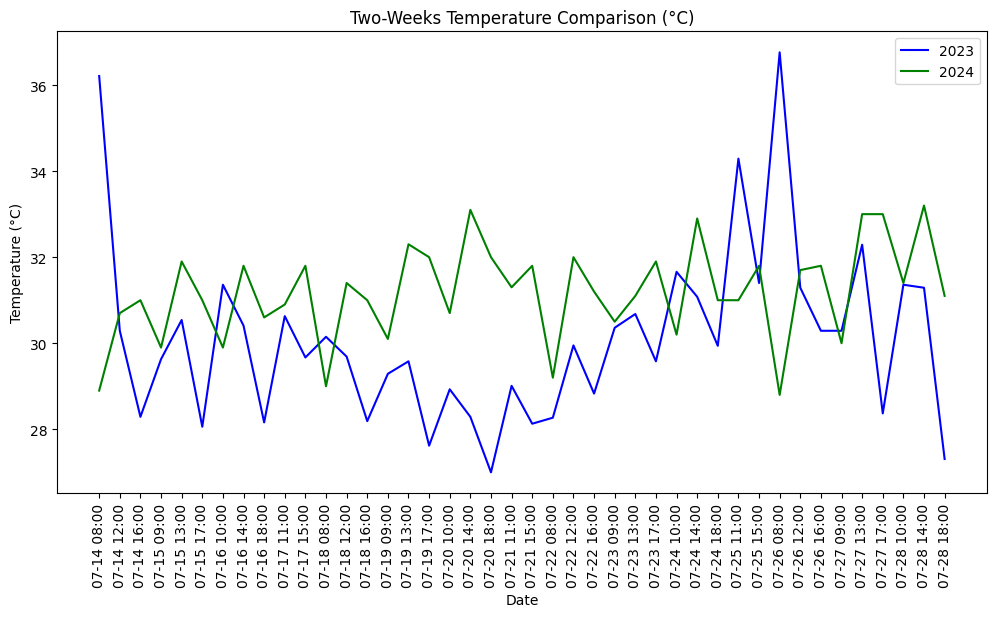

In [70]:

import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your DataFrame)
df = intersection

df=df.iloc[::8, :]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df.index, df['temp_x'], color="b", label='2023')
ax.plot(df.index, df['temp_y'], color="g", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the title
plt.title('Two-Weeks Temperature Comparison (°C)')

# Add legend
plt.legend()

# Show the plot
plt.show()


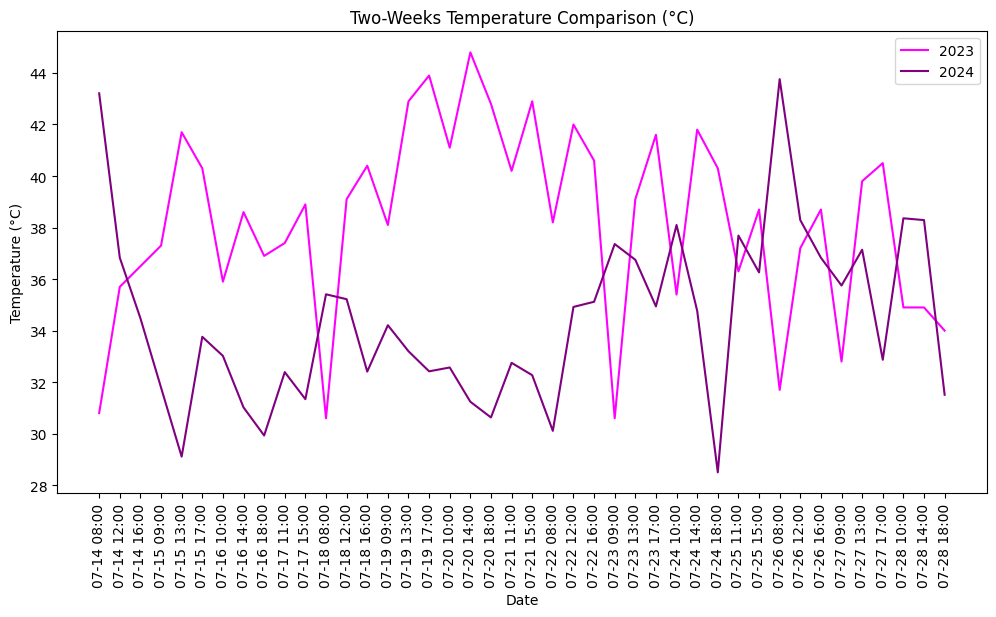

In [73]:
import matplotlib.pyplot as plt

# Sample data for demonstration (replace with your DataFrame)
df = intersection

df=df.iloc[::8, :]

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data
ax.plot(df.index, df['feelslike'], color="magenta", label='2023')
ax.plot(df.index, df['feels_like'], color="purple", label='2024')

# Set the x-axis label
ax.set_xlabel('Date')

# Set the y-axis label
ax.set_ylabel('Temperature (°C)')

# Rotate x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# Set the title
plt.title('Two-Weeks Temperature Comparison (°C)')

# Add legend
plt.legend()

# Show the plot
plt.show()


07-28 10:00
